## PWAD - Precipitation Weighted Area Distribution

The fraction of contiguous convective regions (objects) in bins of area equal to the effective radius of a gridbox of the common grid, weighted by the precipitation rate of respective object<br>

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import skimage.measure as skm

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

### one dataset

In [3]:
metric = 'oAreaAndPr'

o_areaPr_options= [
    'o_area'
    # 'o_pr'
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(metric, datasets[0], experiments[0], resolutions[0]))
ds = get_metric(metric, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:oAreaAndPr, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (region: 181628)
Dimensions without coordinates: region
Data variables:
    o_area   (region) float64 ...
    o_pr     (region) float64 ...
Attributes:
    descrption:  area and precipipitation rate of contiguous convective regio...

In [4]:
data = ds[o_areaPr_options[0]]
data

<xarray.DataArray 'o_area' (region: 181628)>
[181628 values with dtype=float64]
Dimensions without coordinates: region
Attributes:
    units:    km²

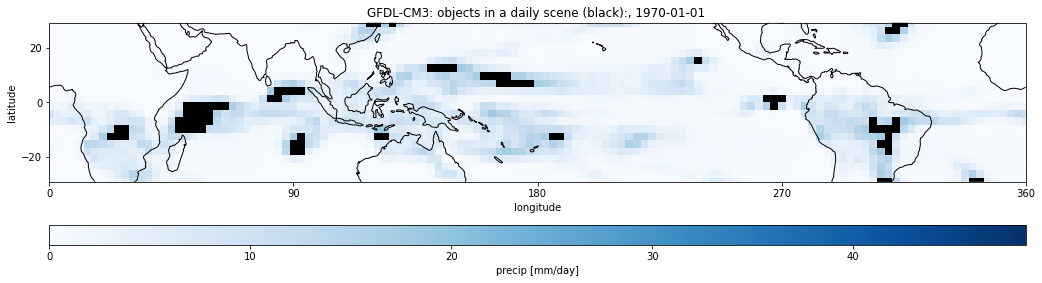

In [5]:
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
conv_threshold = get_metric('prPercentiles', datasets[0], experiments[0])['pr97'].mean(dim=('time'))

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

obj = skm.label(scene.where(scene>=conv_threshold,0)>0, background=np.nan,connectivity=2)
obj = (obj>0)*1
labelMatrix = xr.DataArray(
    data=obj,
    dims=['lat', 'lon'],
    coords={'lat': scene.lat.data, 'lon': scene.lon.data}
    )
obj = labelMatrix.where(labelMatrix>0)


fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
ax.pcolormesh(lonm,latm, obj,transform=cartopy.crs.PlateCarree(), cmap='Greys_r')

ax.set_title(datasets[0] + ': objects in a daily scene (black):' + ', ' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precip' + ' [mm/day]')

Text(0.5, 1.0, 'Fraction of objects in fraction of area distribution')

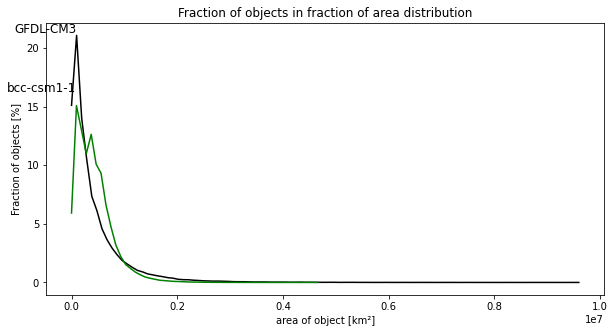

In [6]:
models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

dataset1 = 'GFDL-CM3'
dataset2 = 'bcc-csm1-1'

x = get_metric(metric, dataset1, experiments[0], resolution=resolutions[0])['o_area']
bin_width = (x.max() - x.min())/100
bin_end = x.max()
bins = np.arange(0, bin_end+bin_width, bin_width)

y_bins = []
for i in np.arange(0,len(bins)-1):
    y_bins = np.append(y_bins, ((x>=bins[i]) & (x<bins[i+1])).sum())


x2 = get_metric(metric, dataset2, experiments[0], resolution=resolutions[0])['o_area']
bin_width = (x2.max() - x2.min())/50
bin_end = x2.max()
bins2 = np.arange(0, bin_end+bin_width, bin_width)

y_bins2 = []
for i in np.arange(0,len(bins2)-1):
    y_bins2 = np.append(y_bins2, ((x2>=bins2[i]) & (x2<bins2[i+1])).sum())


plt.figure(figsize = (10,5))
ax = plt.gca()

ax.plot(bins[:-1], y_bins/len(x)*100, 'k')
max_index = np.argmax(y_bins)
max_x = bins[max_index]
ax.text(max_x, y_bins[max_index]/len(x)*100, dataset1, ha='right', va='bottom', fontsize=12, color='k')


ax.plot(bins2[:-1], y_bins2/len(x2)*100, 'g')
max_index = np.argmax(y_bins2)
max_x = bins2[max_index]
ax.text(max_x, y_bins2[max_index]/len(x)*100, dataset2, ha='right', va='bottom', fontsize=12, color='k')

ax.set_xlabel('area of object [{}]'.format('km\u00b2'))
ax.set_ylabel('Fraction of objects [{}]'.format('%'))
ax.set_title('Fraction of objects in fraction of area distribution')


Text(0.5, 1.0, 'Fraction of objects in fraction of precipitation rate distribution')

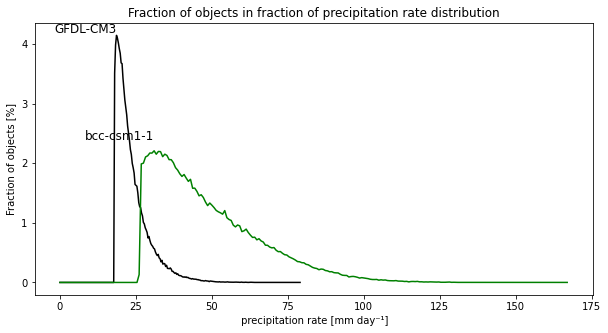

In [7]:
models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

dataset1 = 'GFDL-CM3'
dataset2 = 'bcc-csm1-1'


x = get_metric(metric, dataset1, experiments[0], resolution=resolutions[0])['o_pr']
bin_width = (x.max() - x.min())/200
bin_end = x.max()
bins = np.arange(0, bin_end+bin_width, bin_width)

y_bins = []
for i in np.arange(0,len(bins)-1):
    y_bins = np.append(y_bins, ((x>=bins[i]) & (x<bins[i+1])).sum())



x2 = get_metric(metric, dataset2, experiments[0], resolution=resolutions[0])['o_pr']
bin_width = (x2.max() - x2.min())/200
bin_end = x2.max()
bins2 = np.arange(0, bin_end+bin_width, bin_width)

y_bins2 = []
for i in np.arange(0,len(bins2)-1):
    y_bins2 = np.append(y_bins2, ((x2>=bins2[i]) & (x2<bins2[i+1])).sum())



plt.figure(figsize = (10,5))
ax = plt.gca()

ax.plot(bins[:-1], y_bins/len(x)*100, 'k')
max_index = np.argmax(y_bins)
max_x = bins[max_index]
ax.text(max_x, y_bins[max_index]/len(x)*100, dataset1, ha='right', va='bottom', fontsize=12, color='k')

ax.plot(bins2[:-1], y_bins2/len(x2)*100, 'g')
max_index = np.argmax(y_bins2)
max_x = bins2[max_index]
ax.text(max_x, y_bins2[max_index]/len(x)*100, dataset2, ha='right', va='bottom', fontsize=12, color='k')


ax.set_xlabel(' precipitation rate [{}]'.format('mm day' + chr(0x207B) + chr(0x00B9)))
ax.set_ylabel('Fraction of objects [{}]'.format('%'))
ax.set_title('Fraction of objects in fraction of precipitation rate distribution')

Text(0.5, 1.0, 'Fraction of precipitation in fraction of area distribution (PWAD)')

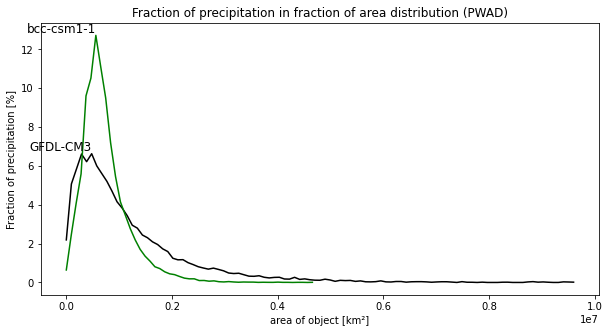

In [8]:
models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

dataset1 = 'GFDL-CM3'
dataset2 = 'bcc-csm1-1'


x = get_metric(metric, dataset1, experiments[0], resolution=resolutions[0])['o_area']
o_pr = get_metric(metric, dataset1, experiments[0], resolution=resolutions[0])['o_pr']

bin_width = (x.max() - x.min())/100
bin_end = x.max()
bins = np.arange(0, bin_end+bin_width, bin_width)

y_bins = []
for i in np.arange(0,len(bins)-1):
    y_bins = np.append(y_bins, np.sum((((x>=bins[i]) & (x<bins[i+1]))>0)*x*o_pr)/np.sum(x*o_pr))



x2 = get_metric(metric, dataset2, experiments[0], resolution=resolutions[0])['o_area']
o_pr2 = get_metric(metric, dataset2, experiments[0], resolution=resolutions[0])['o_pr']

bin_width = (x2.max() - x2.min())/50
bin_end = x2.max()
bins2 = np.arange(0, bin_end+bin_width, bin_width)

y_bins2 = []
for i in np.arange(0,len(bins2)-1):
    y_bins2 = np.append(y_bins2, np.sum((((x2>=bins2[i]) & (x2<bins2[i+1]))>0)*x2*o_pr2)/np.sum(x2*o_pr2))



plt.figure(figsize = (10,5))
ax = plt.gca()

ax.plot(bins[:-1], y_bins*100, 'k')
max_index = np.argmax(y_bins)
max_x = bins[max_index]
ax.text(max_x, y_bins[max_index]*100, dataset1, ha='right', va='bottom', fontsize=12, color='k')


ax.plot(bins2[:-1], y_bins2*100, 'g')
max_index = np.argmax(y_bins2)
max_x = bins2[max_index]
ax.text(max_x, y_bins2[max_index]*100, dataset2, ha='right', va='bottom', fontsize=12, color='k')


ax.set_xlabel('area of object [{}]'.format('km\u00b2'))
ax.set_ylabel('Fraction of precipitation [{}]'.format('%'))
ax.set_title('Fraction of precipitation in fraction of area distribution (PWAD)')

In [9]:
def r_eff(area):
    return np.sqrt(area/np.pi)

In [10]:
# finding effective radius of mean gridbox
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
lat = scene.lat.data
lon = scene.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

area_gridbox = np.mean(aream)
radius_gridbox = r_eff(area_gridbox)
radius_gridbox

171.56802109167054

Text(0.5, 1.0, 'Fraction of precipitation in area bin (incremented by gridbox effective radius) (PWAD) ')

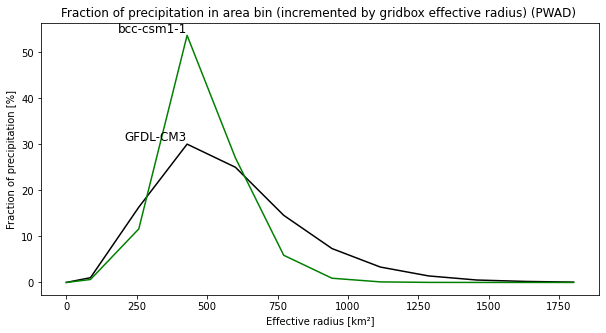

In [26]:
# models = [
#     # 'IPSL-CM5A-MR', # 1
#     # 'GFDL-CM3',     # 2
#     # 'GISS-E2-H',    # 3
#     # 'bcc-csm1-1',   # 4
#     # 'CNRM-CM5',     # 5
#     # 'CCSM4',        # 6
#     # 'HadGEM2-AO',   # 7
#     # 'BNU-ESM',      # 8
#     # 'EC-EARTH',     # 9
#     # 'FGOALS-g2',    # 10
#     # 'MPI-ESM-MR',   # 11
#     # 'CMCC-CM',      # 12
#     # 'inmcm4',       # 13
#     # 'NorESM1-M',    # 14
#     # 'CanESM2',      # 15
#     # 'MIROC5',       # 16
#     # 'HadGEM2-CC',   # 17
#     # 'MRI-CGCM3',    # 18
#     # 'CESM1-BGC'     # 19
#     ]

# observations = [
#     # 'GPCP'
#     ]

dataset1 = 'GFDL-CM3'
dataset2 = 'bcc-csm1-1'


x = get_metric(metric, dataset1, experiments[0], resolution=resolutions[0])['o_area']
o_pr = get_metric(metric, dataset1, experiments[0], resolution=resolutions[0])['o_pr']

bin_width = radius_gridbox #(r_eff(x.max()) - r_eff(x.min()))/100
bin_end = r_eff(x.max())
bins = np.arange(0, bin_end+bin_width, bin_width)

y_bins = []
for i in np.arange(0,len(bins)-1):
    y_bins = np.append(y_bins, np.sum((((r_eff(x)>=bins[i]) & (r_eff(x)<bins[i+1]))>0)*x*o_pr)/np.sum(x*o_pr))

# place the distribution that falls between the edges of a bin in the middle of the bin, and describe that no objects have zero area
y_bins_middle = np.append(0, y_bins)
bins_middle = np.append(0,bins+0.5*bin_width) 



x2 = get_metric(metric, dataset2, experiments[0], resolution=resolutions[0])['o_area']
o_pr2 = get_metric(metric, dataset2, experiments[0], resolution=resolutions[0])['o_pr']

bin_end = r_eff(x.max())
bins2 = np.arange(0, bin_end+bin_width, bin_width)

y_bins2 = []
for i in np.arange(0,len(bins2)-1):
    y_bins2 = np.append(y_bins2, np.sum((((r_eff(x2)>=bins2[i]) & (r_eff(x2)<bins2[i+1]))>0)*x2*o_pr2)/np.sum(x2*o_pr2))

# place the distribution that falls between the edges of a bin in the middle of the bin, and describe that no objects have zero area
y_bins_middle2 = np.append(0, y_bins2)
bins_middle2 = np.append(0,bins2+0.5*bin_width) 


plt.figure(figsize = (10,5))
ax = plt.gca()

ax.plot(bins_middle[:-1], y_bins_middle*100, 'k')
max_index = np.argmax(y_bins_middle)
max_x = bins_middle[max_index]
ax.text(max_x, y_bins_middle[max_index]*100, dataset1, ha='right', va='bottom', fontsize=12, color='k')


ax.plot(bins_middle2[:-1], y_bins_middle2*100, 'g')
max_index = np.argmax(y_bins_middle2)
max_x = bins_middle2[max_index]
ax.text(max_x, y_bins_middle2[max_index]*100, dataset2, ha='right', va='bottom', fontsize=12, color='k')


ax.set_xlabel('Effective radius [{}]'.format('km\u00b2'))
ax.set_ylabel('Fraction of precipitation [{}]'.format('%'))
ax.set_title('Fraction of precipitation in area bin (incremented by gridbox effective radius) (PWAD) ')


### comparing datasets

In [12]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    'GPCP' # 20
    ]

datasets = models + observations

experiments =[
    'historical',
    # 'rcp85'
    ]

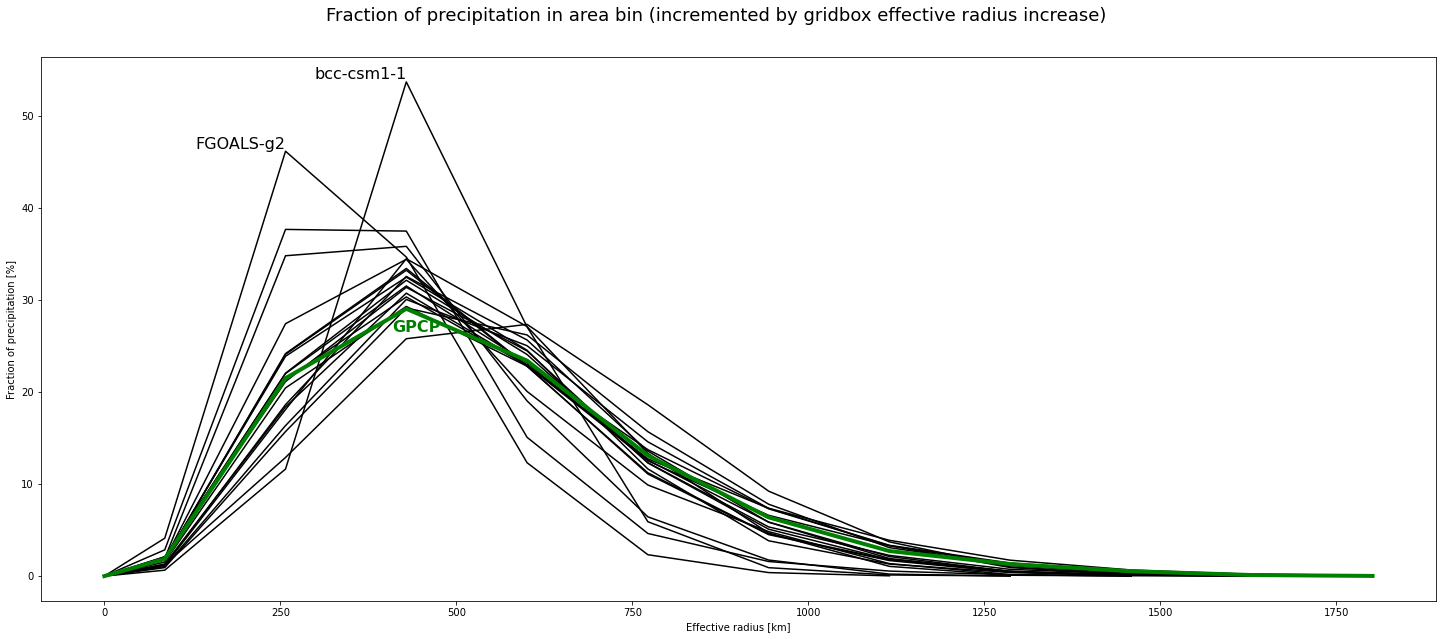

In [13]:
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
lat = scene.lat.data
lon = scene.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

area_gridbox = np.mean(aream)
radius_gridbox = r_eff(area_gridbox)
bin_width = radius_gridbox

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])['o_area']
        x= data

        vmin = np.append(vmin, np.quantile(x, quantile_low))
        vmax = np.append(vmax, np.quantile(x, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(25,10))
title = 'Fraction of precipitation in area bin (incremented by gridbox effective radius increase)'

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):

    ds = get_metric(metric, dataset, experiments[0])
    x= ds['o_area']
    o_pr = ds['o_pr']
    
    bin_end = r_eff(x.max())
    bins = np.arange(0, bin_end+bin_width, bin_width)

    y_bins = []
    for i in np.arange(0,len(bins)-1):
        y_bins = np.append(y_bins, np.sum((((r_eff(x)>=bins[i]) & (r_eff(x)<bins[i+1]))>0)*x*o_pr)/np.sum(x*o_pr)*100)

    # place the distribution that falls between the edges of a bin in the middle of the bin, and describe that no objects have zero area
    y_bins_middle = np.append(0, y_bins)
    bins_middle = np.append(0,bins+0.5*bin_width) 
    
    ax = plt.gca()
    
    if dataset=='GPCP':
        ax.plot(bins_middle[:-1], y_bins_middle, linewidth = 4, color = 'g')

    ax.plot(bins_middle[:-1], y_bins_middle, 'k', zorder=0)

    max_index = np.argmax(y_bins_middle)
    max_x = bins_middle[max_index]
    
    if dataset == 'bcc-csm1-1' or dataset == 'FGOALS-g2' or dataset == 'canESM2':
        ax.text(max_x, y_bins_middle[max_index], dataset, ha='right', va='bottom', fontsize=16, color='k')

    if dataset == 'GPCP':
        ax.text(max_x-20, y_bins_middle[max_index]-2.5, dataset, fontsize=16, color='g', weight='bold') 


    ax.set_xlabel('Effective radius [{}]'.format('km'))
    ax.set_ylabel('Fraction of precipitation [{}]'.format('%'))




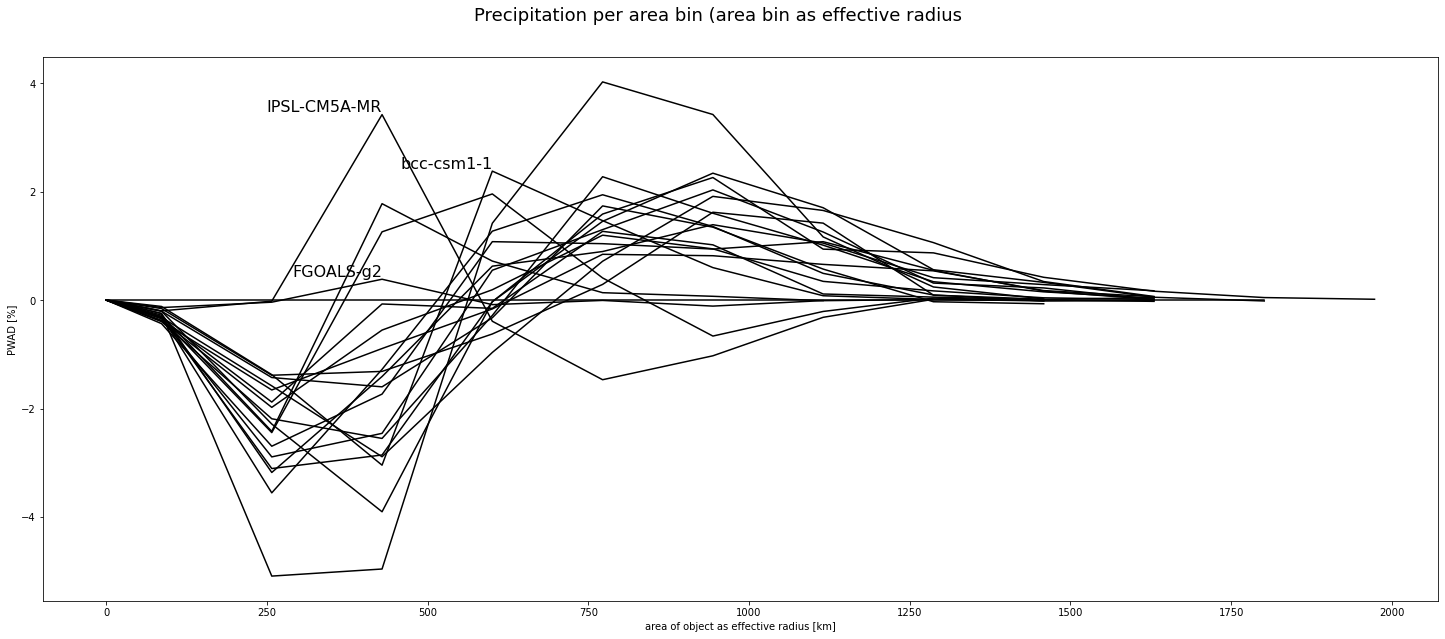

In [14]:
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
lat = scene.lat.data
lon = scene.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

area_gridbox = np.mean(aream)
radius_gridbox = r_eff(area_gridbox)
bin_width = radius_gridbox

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data_historical = get_metric(metric, dataset, experiment='historical')['o_area']
        data_rcp = get_metric(metric, dataset, experiment='rcp85')['o_area']

        vmin = np.append(vmin, np.min([np.quantile(data_historical, quantile_low), np.quantile(data_rcp, quantile_low)]))
        vmax = np.append(vmax, np.max([np.quantile(data_historical, quantile_high), np.quantile(data_rcp, quantile_high)]))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(25,10))
title = 'Precipitation per area bin (area bin as effective radius'

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):

    ds = get_metric(metric, dataset, experiment='historical')
    x1 = ds['o_area']
    o_pr1 = ds['o_pr']

    ds = get_metric(metric, dataset, experiment='rcp85')
    x2 = ds['o_area']
    o_pr2 = ds['o_pr']

    bin_end = r_eff(np.max([np.max(x1), np.max(x2)]) )
    bins = np.arange(0, bin_end+bin_width, bin_width)

    y_bins1 = []
    for i in np.arange(0,len(bins)-1):
        y_bins1 = np.append(y_bins1, np.sum((((r_eff(x1)>=bins[i]) & (r_eff(x1)<bins[i+1]))>0)*x1*o_pr1)/np.sum(x1*o_pr1)*100)

    y_bins2 = []
    for i in np.arange(0,len(bins)-1):
        y_bins2 = np.append(y_bins2, np.sum((((r_eff(x2)>=bins[i]) & (r_eff(x2)<bins[i+1]))>0)*x2*o_pr2)/np.sum(x2*o_pr2)*100)

    # place the distribution that falls between the edges of a bin in the middle of the bin, and describe that no objects have zero area
    y_bins = y_bins2 - y_bins1
    y_bins_middle = np.append(0, y_bins)
    bins_middle = np.append(0,bins+0.5*bin_width) 
    
    ax = plt.gca()

    ax.plot(bins_middle[:-1], y_bins_middle, 'k', zorder=0)

    max_index = np.argmax(y_bins_middle)
    max_x = bins_middle[max_index]
    
    if dataset == 'bcc-csm1-1' or dataset == 'FGOALS-g2' or dataset == 'IPSL-CM5A-MR':
        ax.text(max_x, y_bins_middle[max_index], dataset, ha='right', va='bottom', fontsize=16, color='k')

    ax.set_xlabel('area of object as effective radius [{}]'.format('km'))
    ax.set_ylabel('PWAD [{}]'.format('%'))



Text(0, 0.5, 'area [km²]')

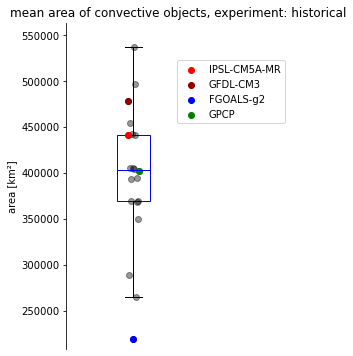

In [15]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    'GPCP'            # 20
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        ds = get_metric(metric, dataset, experiments[0])
        y = ds['o_area'].mean(dim='region')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(4,6))
title = 'mean area of convective objects, experiment: {}'.format(experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
        
    ds = get_metric(metric, dataset, experiments[0])
    y_data = ds['o_area'].mean(dim='region')

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel('area [{}]'.format(data.units))

Text(0, 0.5, 'area [km² K⁻¹]')

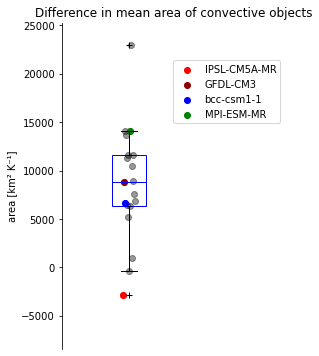

In [16]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data_historical = get_metric(metric, dataset, experiment='historical')['o_area'].mean(dim='region')
        data_rcp = get_metric(metric, dataset, experiment='rcp85')['o_area'].mean(dim='region')

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas']
        aWeights = np.cos(np.deg2rad(tas_historical.lat))
        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp85 - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(4,6))
title = 'Difference in mean area of convective objects'
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    if dataset == 'GPCP':
        continue

    data_historical = get_metric(metric, dataset, experiment='historical')['o_area'].mean(dim='region')
    data_rcp = get_metric(metric, dataset, experiment='rcp85')['o_area'].mean(dim='region')

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas']
    aWeights = np.cos(np.deg2rad(tas_historical.lat))
    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp85 - tas_historical
    datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)

data.attrs['units'] = 'km\u00b2 K'+ chr(0x207B) + chr(0x00B9) 
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.ylim([3*vmin,1.1*vmax])
plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel('area [{}]'.format(data.units))